# Analysis of Tweet posting stats

## Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_users = pd.read_json("data/test-user-stats.ndjson", lines=True)
df_users['created_at'] = pd.to_datetime(df_users['created_at'])
df_users['first_tweet'] = pd.to_datetime(df_users['first_tweet'])
df_users['last_tweet'] = pd.to_datetime(df_users['last_tweet'])

In [3]:
df_users.drop(columns=["id", "user_name", "display_name"]) # Removing columns for privacy

,verified,identifiable,created_at,first_tweet,last_tweet,n_tweets,n_orig_tweets,n_replies,n_quotes,n_retweets,hashtags,following,followers
0,False,True,2016-09-03 21:21:39,2018-12-20 05:35:06,2018-12-31 23:59:35,3,2,1,0,0,"[[#dkgreen, 3], [#dkpol, 2], [#plasticchange, ...",1666,1078
1,False,False,2010-09-27 17:40:20,2018-12-22 21:53:22,2018-12-31 23:59:20,2,1,0,0,1,[],322,123
2,False,True,2011-04-03 11:17:51,2018-12-25 11:15:27,2018-12-31 23:59:11,2,2,0,0,0,"[[#nytår, 1]]",241,13
3,False,False,2016-09-26 13:08:09,2018-12-22 17:59:02,2018-12-31 23:58:16,3,1,2,0,0,[],529,225
4,False,False,2012-02-06 01:40:27,2018-12-31 23:56:25,2018-12-31 23:56:25,1,1,0,0,0,[],599,807
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22913,False,True,2009-03-06 18:23:06,2018-12-19 15:19:29,2018-12-19 15:19:29,1,0,1,0,0,[],680,1223
22914,False,True,2012-11-30 07:52:09,2018-12-19 15:14:18,2018-12-19 15:14:18,1,0,0,0,1,[],127,41
22915,False,False,2018-10-07 16:38:29,2018-12-19 15:03:15,2018-12-19 15:03:15,1,0,0,0,1,[],21,5
22916,False,False,2009-03-12 12:00:03,2018-12-19 15:02:35,2018-12-19 15:02:35,1,1,0,0,0,"[[#arbejde, 1]]",1083,1467


In [4]:
df_tweets = pd.read_json("data/test-minimal-tweets.ndjson", lines=True) 

In [5]:
df_tweets.drop(columns=["id", "text", "author_id"]) # Removing columns for privacy

,public_metrics,created_at,type
0,"{'retweet_count': 39, 'reply_count': 0, 'like_...",2018-12-31 23:59:57,RETWEET
1,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2018-12-31 23:59:54,ORIGINAL
2,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2018-12-31 23:59:50,ORIGINAL
3,"{'retweet_count': 1, 'reply_count': 1, 'like_c...",2018-12-31 23:59:35,ORIGINAL
4,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2018-12-31 23:59:20,ORIGINAL
...,...,...,...
99995,"{'retweet_count': 1, 'reply_count': 1, 'like_c...",2018-12-19 14:55:15,ORIGINAL
99996,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",2018-12-19 14:55:09,REPLY
99997,"{'retweet_count': 0, 'reply_count': 2, 'like_c...",2018-12-19 14:55:03,ORIGINAL
99998,"{'retweet_count': 1, 'reply_count': 0, 'like_c...",2018-12-19 14:54:59,ORIGINAL


## User stats

### Verified and identifiable

In [6]:
# Number of accounts, specifically accounts that have posted at least one tweet
n_accounts = len(df_users)

# Number of verified accounts
n_verified = (df_users.verified == True).sum()

# Number of identifiable accounts
n_identifiable = (df_users.identifiable == True).sum()

user_stats_summary = pd.DataFrame({
    'Label': ['Accounts', 'Verified', 'Identifiable'],
    '#': [n_accounts, n_verified, n_identifiable]
})
user_stats_summary['%'] = user_stats_summary['#'] / n_accounts * 100

In [7]:
user_stats_summary

,Label,#,%
0,Accounts,22918,100.000000
1,Verified,499,2.177328
2,Identifiable,7122,31.076010


### Followers and following

Maybe for these numbers to be meaningful, we also need stats for "lurkers"? But can we get that?

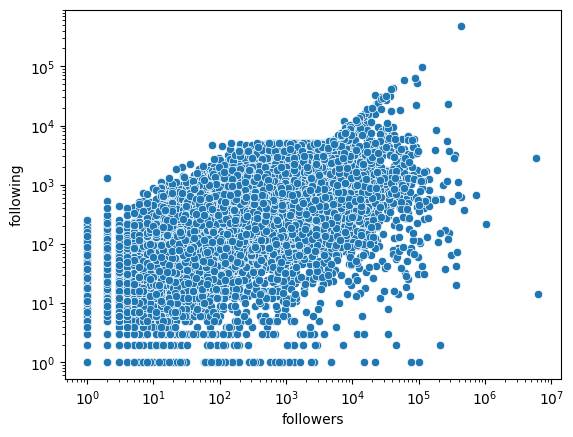

In [8]:
sns.scatterplot(x='followers', y='following', data=df_users)
plt.xscale('log')
plt.yscale('log')

### Activity

When calculating average daily tweets, we need an "active time" which can be a time delta between two of these points in time:
- user creation date
- date of first tweet
- date of last tweet
- end date of data

The time between first tweet and last tweet is a sure time of activity on Twitter, and it might give the best picture. But maybe we need to take out users with just one or two tweets. 

In [9]:
df_users["active_days"] = df_users.apply(
    lambda row: (row["last_tweet"] - row["first_tweet"]).days + 1, # adding one or not?
    axis=1
)
df_users["avg_daily_tweets"] = df_users.apply(
    lambda row: (row["n_tweets"] - row["n_retweets"]) / row["active_days"],
    axis=1
)

<Axes: xlabel='avg_daily_tweets', ylabel='Density'>

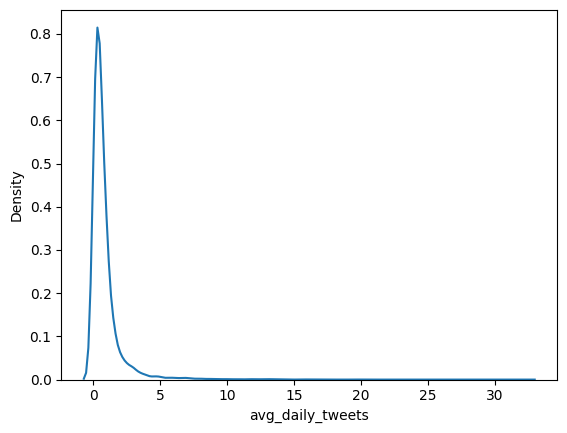

In [10]:
df_active_users = df_users[df_users["active_days"] > 1]
sns.kdeplot(data=df_active_users, x='avg_daily_tweets')

In [11]:
df_active_users["avg_daily_tweets"].describe()

count    8500.000000
mean        0.867705
std         1.405839
min         0.000000
25%         0.250000
50%         0.500000
75%         1.000000
max        32.272727
Name: avg_daily_tweets, dtype: float64

#### Creation date

<Axes: xlabel='created_at', ylabel='Density'>

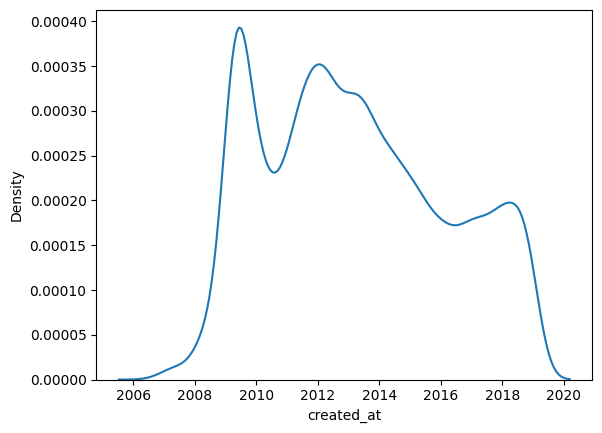

In [12]:
sns.kdeplot(data=df_users, x='created_at')

In [13]:
# Most popular dates
df_users['created_at'].dt.to_period('D').value_counts()

2009-03-11    44
2009-04-17    38
2009-03-25    34
2009-03-12    34
2009-03-24    33
              ..
2008-03-21     1
2010-07-20     1
2018-03-14     1
2008-09-11     1
2008-04-05     1
Freq: D, Name: created_at, Length: 3975, dtype: int64

In [14]:
# Most popular months
df_users['created_at'].dt.to_period('M').value_counts()

2009-04    607
2009-03    535
2009-06    414
2009-07    379
2012-01    335
          ... 
2006-11      4
2006-12      3
2006-09      3
2007-02      2
2006-10      1
Freq: M, Name: created_at, Length: 148, dtype: int64

In [15]:
# Most popular quarters
df_users['created_at'].dt.to_period('Q').value_counts()[:10]

2009Q2    1328
2009Q1     877
2009Q3     865
2012Q1     852
2011Q3     779
2013Q2     750
2012Q2     747
2011Q4     687
2013Q1     676
2013Q3     669
Freq: Q-DEC, Name: created_at, dtype: int64

In [16]:
# Most popular years
df_users['created_at'].dt.to_period('Y').value_counts()

2009    3552
2012    2843
2011    2686
2013    2633
2014    2097
2018    1918
2010    1856
2015    1695
2017    1542
2016    1426
2008     535
2007     124
2006      11
Freq: A-DEC, Name: created_at, dtype: int64

In [17]:
# alternative with more fine-grained control:
df_users.resample('6M', on='created_at').size().sort_values(ascending=False)[:10]

created_at
2009-09-30    2193
2012-03-31    1539
2013-09-30    1419
2012-09-30    1386
2011-09-30    1383
2013-03-31    1281
2014-03-31    1113
2014-09-30    1085
2009-03-31    1063
2011-03-31    1037
dtype: int64

#### First tweet

<Axes: xlabel='first_tweet', ylabel='Density'>

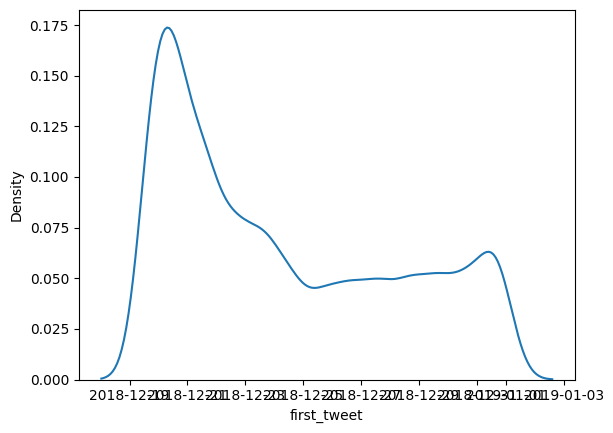

In [18]:
sns.kdeplot(data=df_users, x='first_tweet')

In [19]:
# Most popular months
df_users['first_tweet'].dt.to_period('D').value_counts()

2018-12-20    3915
2018-12-19    2883
2018-12-21    2711
2018-12-22    1832
2018-12-31    1778
2018-12-23    1726
2018-12-24    1220
2018-12-30    1200
2018-12-29    1186
2018-12-27    1176
2018-12-28    1157
2018-12-26    1106
2018-12-25    1028
Freq: D, Name: first_tweet, dtype: int64

## Tweet stats

### Number of tweets

In [20]:
df_tweets["creation_month"] = df_tweets["created_at"].astype('datetime64[D]')

In [21]:
df_tweets[["creation_month", "created_at"]]

,creation_month,created_at
0,2018-12-31,2018-12-31 23:59:57
1,2018-12-31,2018-12-31 23:59:54
2,2018-12-31,2018-12-31 23:59:50
3,2018-12-31,2018-12-31 23:59:35
4,2018-12-31,2018-12-31 23:59:20
...,...,...
99995,2018-12-19,2018-12-19 14:55:15
99996,2018-12-19,2018-12-19 14:55:09
99997,2018-12-19,2018-12-19 14:55:03
99998,2018-12-19,2018-12-19 14:54:59


(array([17884., 17886., 17888., 17890., 17892., 17894., 17896.]),
 [Text(17884.0, 0, '2018-12-19'),
  Text(17886.0, 0, '2018-12-21'),
  Text(17888.0, 0, '2018-12-23'),
  Text(17890.0, 0, '2018-12-25'),
  Text(17892.0, 0, '2018-12-27'),
  Text(17894.0, 0, '2018-12-29'),
  Text(17896.0, 0, '2018-12-31')])

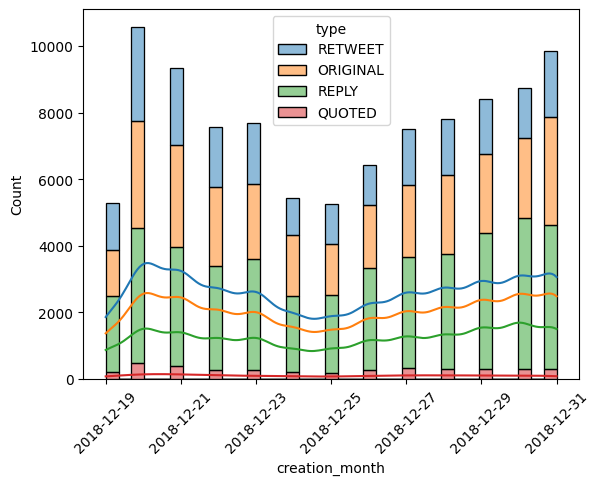

In [22]:
sns.histplot(data=df_tweets, x='creation_month', hue='type', multiple='stack', kde=True)
plt.xticks(rotation=45)

In [23]:
# Most popular days
df_tweets['created_at'].dt.to_period('D').value_counts()

2018-12-20    10583
2018-12-31     9864
2018-12-21     9354
2018-12-30     8735
2018-12-29     8428
2018-12-28     7820
2018-12-23     7703
2018-12-22     7581
2018-12-27     7505
2018-12-26     6443
2018-12-24     5447
2018-12-19     5292
2018-12-25     5245
Freq: D, Name: created_at, dtype: int64

### Hashtags

In [24]:
import re
hashtag = re.compile(r"#(?!\d)\w+")

def get_hashtags(tweet):
    return list(set(re.findall(hashtag, tweet))) # ensuring unique hashtags per tweet

df_tweets["hashtags"] = df_tweets["text"].apply(get_hashtags)

In [25]:
n_tagged_tweets = df_tweets[df_tweets["hashtags"].apply(lambda x: x != [])].size
# a hashtagger is a user who uses hashtags
n_hashtaggers = df_tweets[df_tweets["hashtags"].apply(lambda x: x != [])]["author_id"].nunique()

In [26]:
df_hashtags = df_tweets.explode("hashtags")\
    .groupby("hashtags")\
    .aggregate(
        in_n_tweets=('hashtags', 'size'),
        by_n_users=('author_id', 'nunique')
    ).sort_values("in_n_tweets", ascending=False)
df_hashtags["tweet_coverage"] = df_hashtags["in_n_tweets"] / n_tagged_tweets * 100
df_hashtags["user_coverage"] = df_hashtags["by_n_users"] / n_hashtaggers * 100

In [27]:
df_hashtags[:20]

,in_n_tweets,by_n_users,tweet_coverage,user_coverage
hashtags,,,,
#dkpol,4747,1662,3.803930,27.672328
#dkmedier,1310,567,1.049747,9.440559
#pldk,542,186,0.434323,3.096903
#dkgreen,369,198,0.295692,3.296703
#politidk,312,67,0.250016,1.115551
#sldk,277,171,0.221969,2.847153
#dkbiz,250,180,0.200333,2.997003
#sundpol,213,129,0.170684,2.147852
#twitterhjerne,206,133,0.165075,2.214452
